In [167]:
from simulator.reporters import TransitionReporter
from simulator.core import Task
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [168]:
reportList = [TransitionReporter.getListFromPickle("reports/reportmobiledql2.pkl"), 
              TransitionReporter.getListFromPickle("reports/reportmobilegreedy3.pkl"), 
              TransitionReporter.getListFromPickle("reports/reportmobileremote.pkl"), 
              TransitionReporter.getListFromPickle("reports/reportmobilelocal.pkl")]

In [169]:
pandasData = []
for report in reportList:
    pandasList = []
    for item in report:
        pandasList.append([item.task.id(), item.task.arrivalTime(), item.delay, item.powerConsumtion, item.action, item.task.hopLimit()])
    pandasData.append(pandasList)

In [170]:
dfList = []
for list in pandasData:
    dfList.append(pd.DataFrame(list, columns = ["taskid", "arrival", "delay", "power", "action", "hopLimit"]))
dfList[0]

,taskid,arrival,delay,power,action,hopLimit
0,1268,0.121763,1.313020,0.656510,"(0, (), ())",2
1,1292,0.555738,1.033880,0.028954,"(1, (), ())",0
2,1273,0.246070,1.370956,0.685478,"(0, (), ())",2
3,1265,0.111330,1.577082,0.788541,"(0, (), ())",2
4,1263,0.043346,1.651238,0.825619,"(0, (), ())",2
...,...,...,...,...,...,...
9935,11198,199.883452,5.264961,0.076680,"(1, (), ())",1
9936,11150,198.774781,6.780376,0.071616,"(1, (), ())",1
9937,11108,197.877659,8.392338,0.118691,"(1, (), ())",1
9938,11121,198.107174,8.602263,2.387910,"(0, (), ())",2


In [171]:
dfCuts = []
for df in dfList:
    data = df.loc[:, ["delay"]].groupby(
        pd.cut(df["arrival"], np.arange(0, 200, 1))).mean()
    data.index = pd.IntervalIndex(data.index.get_level_values('arrival')).right
    dfCuts.append(data)

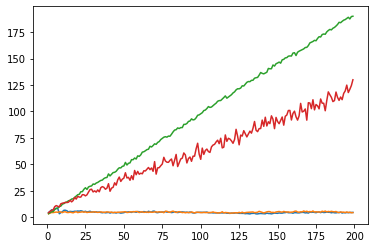

In [172]:

for data in dfCuts:
    plt.plot(data)
